<a href="https://colab.research.google.com/github/brkent/SummerStudent2023/blob/main/example07_image_compare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VLA Sky Survey Image Comparison

### [Brian R. Kent](https://www.cv.nrao.edu/~bkent/), National Radio Astronomy Observatory ([NRAO](https://science.nrao.edu/))
@VizAstro on [Twitter](https://www.twitter.com/vizastro), [Instagram](https://www.instagram.com/vizastro), and [YouTube](https://www.youtube.com/user/VisualizeAstronomy).

This notebook shows how to utilize a number of basic Python tools to display VLASS image cutouts and compare them to other surveys.

Have a look at object [MCG -02-04-010](https://ned.ipac.caltech.edu/byname?objname=MCG+-02-04-010&hconst=67.8&omegam=0.308&omegav=0.692&wmap=4&corr_z=1)

In [ ]:
!pip install aplpy

In [ ]:
!pip install astroquery

In [ ]:
import os

import aplpy
from astroquery.skyview import SkyView

import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.wcs import WCS

from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.nddata import Cutout2D

INFO:astropy:Auto-setting vmin to -7.018e-02
INFO:astropy:Auto-setting vmax to  7.548e-01


INFO: Auto-setting vmin to -7.018e-02 [aplpy.core]
INFO: Auto-setting vmax to  7.548e-01 [aplpy.core]


INFO:astropy:Auto-setting vmin to  4.096e+03
INFO:astropy:Auto-setting vmax to  1.998e+04


INFO: Auto-setting vmin to  4.096e+03 [aplpy.core]
INFO: Auto-setting vmax to  1.998e+04 [aplpy.core]


Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'.
Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'.


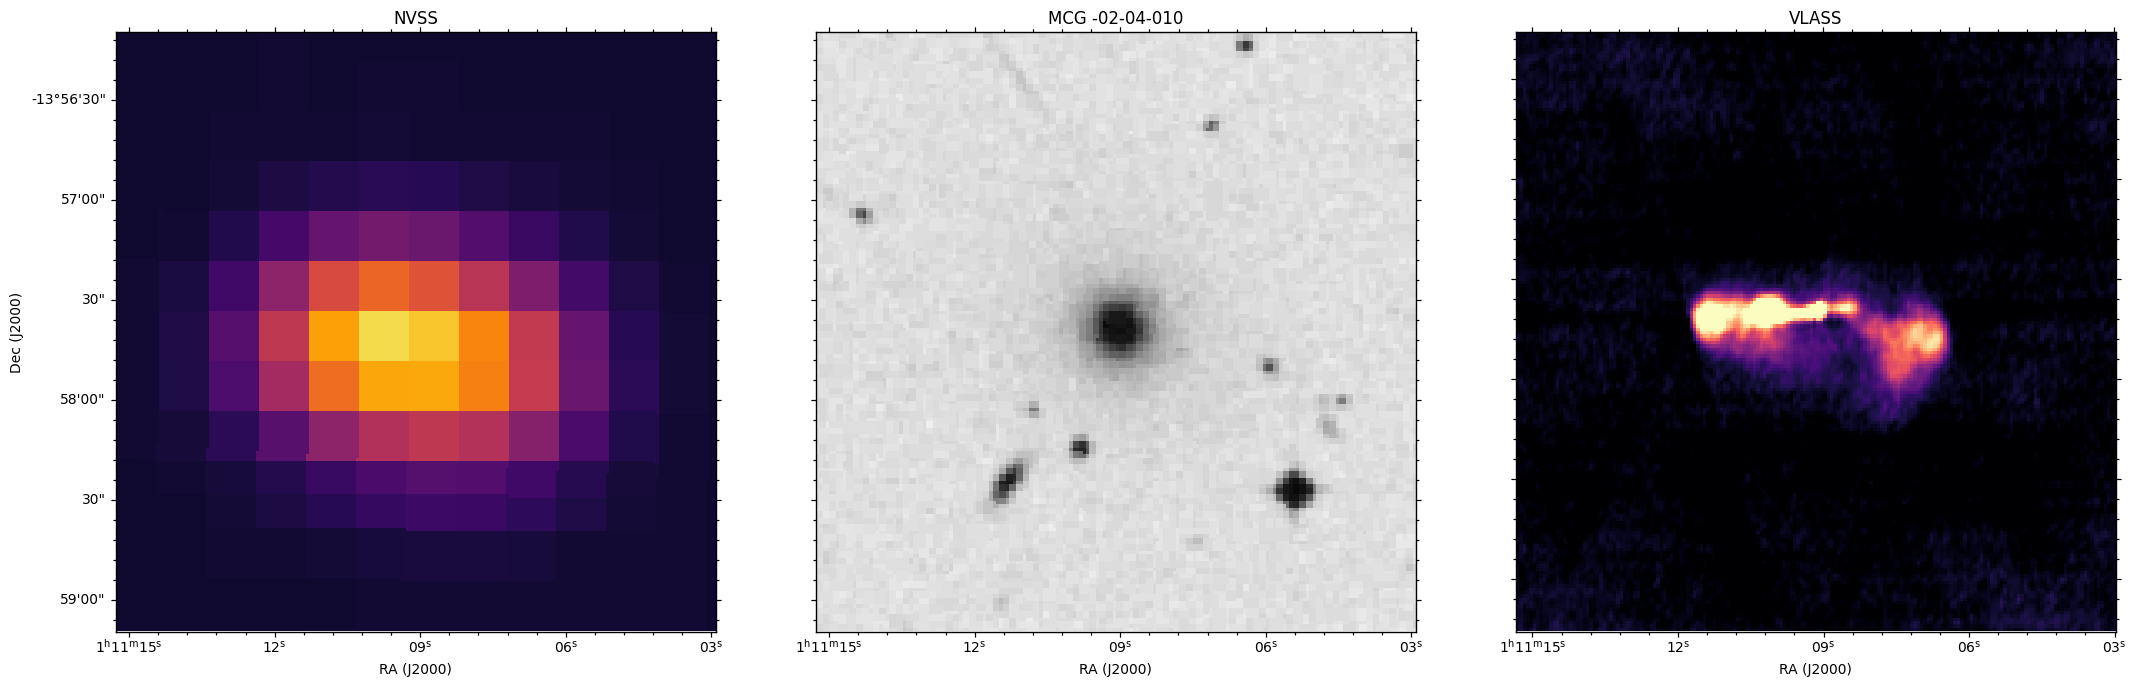

In [ ]:
position_coord = '01h11m09.1875s   -13d57m45.9823s'
position = SkyCoord(position_coord, frame='icrs')
size = 3.0 * u.arcmin
objname = 'MCG -02-04-010'


fig = plt.figure(figsize=(20,6), facecolor='white', edgecolor='black', frameon=True) #, sharey='row')

radius = size
imagelist = SkyView.get_images(position=objname, radius=radius, pixels=str(int(radius.value*60)),survey=['NVSS'])
NVSS_image_hdu = imagelist[0][0]



ax1 = aplpy.FITSFigure(NVSS_image_hdu, figure=fig, subplot=[0.1,0.1,0.3,1.0])
ax1.show_colorscale(cmap='inferno')

ax1.set_title(os.path.basename('NVSS'))



# Can change survey paramter to be any survey listed here:
# https://astroquery.readthedocs.io/en/latest/skyview/skyview.html#module-astroquery.skyview
imagelist = SkyView.get_images(position=objname, radius=radius, pixels=str(int(radius.value*60)),survey=['DSS2 Blue'])
DSS2BLUE_image_hdu = imagelist[0][0]


ax2 = aplpy.FITSFigure(DSS2BLUE_image_hdu, figure=fig, subplot=[0.45,0.1,0.3,1.0])
ax2.show_colorscale(cmap='gray_r')
ax2.tick_labels.hide_y()
ax2.axis_labels.hide_y()
ax2.set_title(objname)




target_url = 'https://archive-new.nrao.edu/vlass/quicklook/VLASS1.1v2/T07t02/VLASS1.1.ql.T07t02.J011047-133000.10.2048.v1/VLASS1.1.ql.T07t02.J011047-133000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'

VLASS_FITS = fits.open(target_url)
wcs = WCS(VLASS_FITS[0].header, naxis=2)
cutout = Cutout2D(VLASS_FITS[0].data[0,0,:,:], position=position, size=size, wcs=wcs)
hdu = fits.PrimaryHDU(cutout.data)
hdu.header.update(cutout.wcs.to_header())

ax3 = aplpy.FITSFigure(hdu, figure=fig, subplot=[0.8,0.1,0.3,1.0])
ax3.show_colorscale(cmap='magma', vmin=-.0001, vmax=0.005)
ax3.tick_labels.hide_y()
ax3.axis_labels.hide_y()
ax3.set_title(os.path.basename('VLASS'))


fig.canvas.draw()